In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("hmeq_SMOTE.csv")

In [6]:
df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,TARGET
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.000000,34.818262,1,0,1,0,0,0,1
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.000000,34.818262,1,0,1,0,0,0,1
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.000000,34.818262,1,0,1,0,0,0,1
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,0.0,21.296096,34.818262,0,0,1,0,0,0,1
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.000000,34.818262,1,1,0,0,0,0,0


In [10]:
X = df.drop('TARGET', axis=1)

In [12]:
y = df['TARGET']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [33]:
n_estimators = [64, 100, 128, 200]
max_features = ['sqrt','log2']
bootstrap = [True, False]
oob_score = [True, False]

In [35]:
param_grid = {'n_estimators':n_estimators, 
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score} # Note, oob_score only makes sense when bootstrap=True!

In [37]:
rfc = RandomForestClassifier()

In [39]:
grid = GridSearchCV(rfc, param_grid)

In [ ]:
grid.fit(X_train, y_train)

In [43]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'n_estimators': 128,
 'oob_score': False}

In [45]:
preds = grid.predict(X_test)

In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       726
           1       0.96      0.95      0.96       706

    accuracy                           0.96      1432
   macro avg       0.96      0.96      0.96      1432
weighted avg       0.96      0.96      0.96      1432



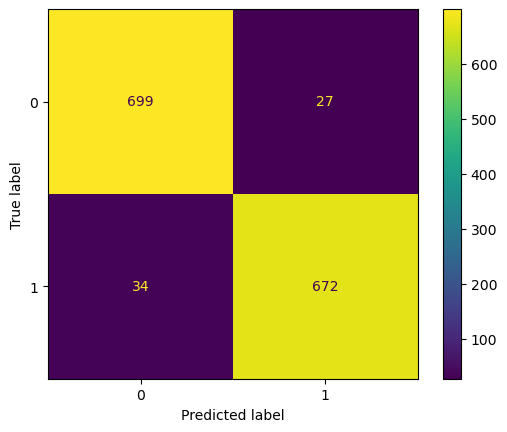

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [61]:
errors = []
misclassifications = []

for n in range(1,128):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

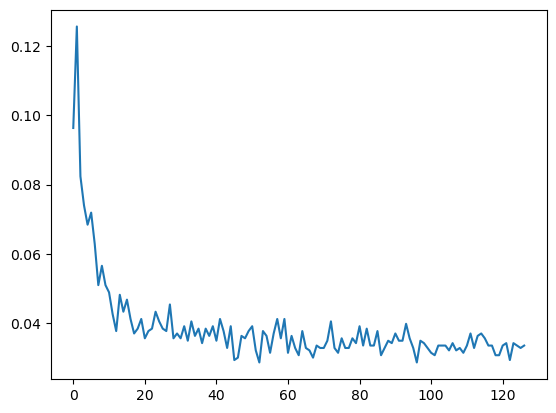

In [63]:
plt.plot(rangeerrors)

In [ ]:
plt.plot(range(1,64),misclassifications)